<a href="https://colab.research.google.com/github/GURUPRASAD120303/Handwritten-Number-Detection/blob/main/Handwritten_Number_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning-Based Handwritten Number Detection from Images**

**Import Necessary Libraries**

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

**Load and Preprocess the Dataset**

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


**Build the CNN Model**

In [3]:
# Initialize the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the Model**

In [4]:
# Compile the model with optimizer, loss, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Train the Model**

In [5]:
# Train the model with training data and validate on test data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9097 - loss: 0.2993 - val_accuracy: 0.9857 - val_loss: 0.0449
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.9912 - val_loss: 0.0309
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9913 - val_loss: 0.0270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9851 - val_loss: 0.0537
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9902 - val_loss: 0.0370
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9916 - val_loss: 0.0343
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9972 - loss: 0.00

**History and Visualization**

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming you have already trained the model and have the history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0028 - val_accuracy: 0.9911 - val_loss: 0.0550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9898 - val_loss: 0.0624
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9936 - val_loss: 0.0477
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.9922 - val_loss: 0.0508
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9920 - val_loss: 0.0576
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0022 - val_accuracy: 0.9921 - val_loss: 0.0527
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9912 - val_loss: 0.0556
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9993 - loss: 0.0023 

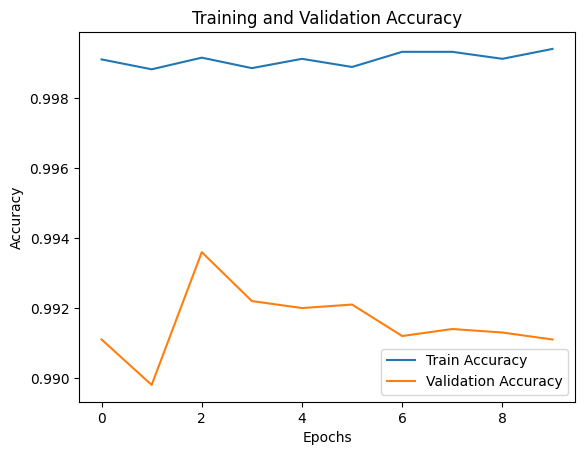

In [35]:
# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

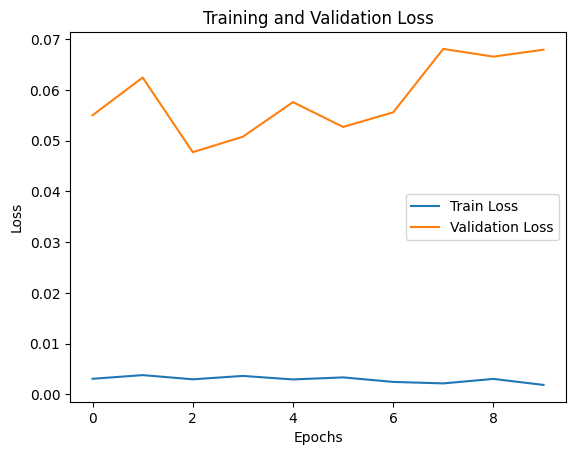

In [33]:
# Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
# Evaluate the model on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


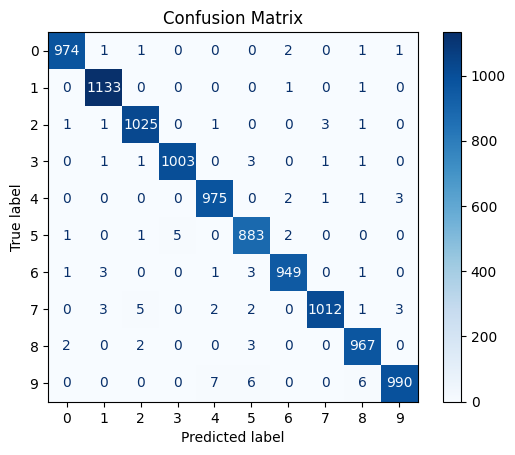

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

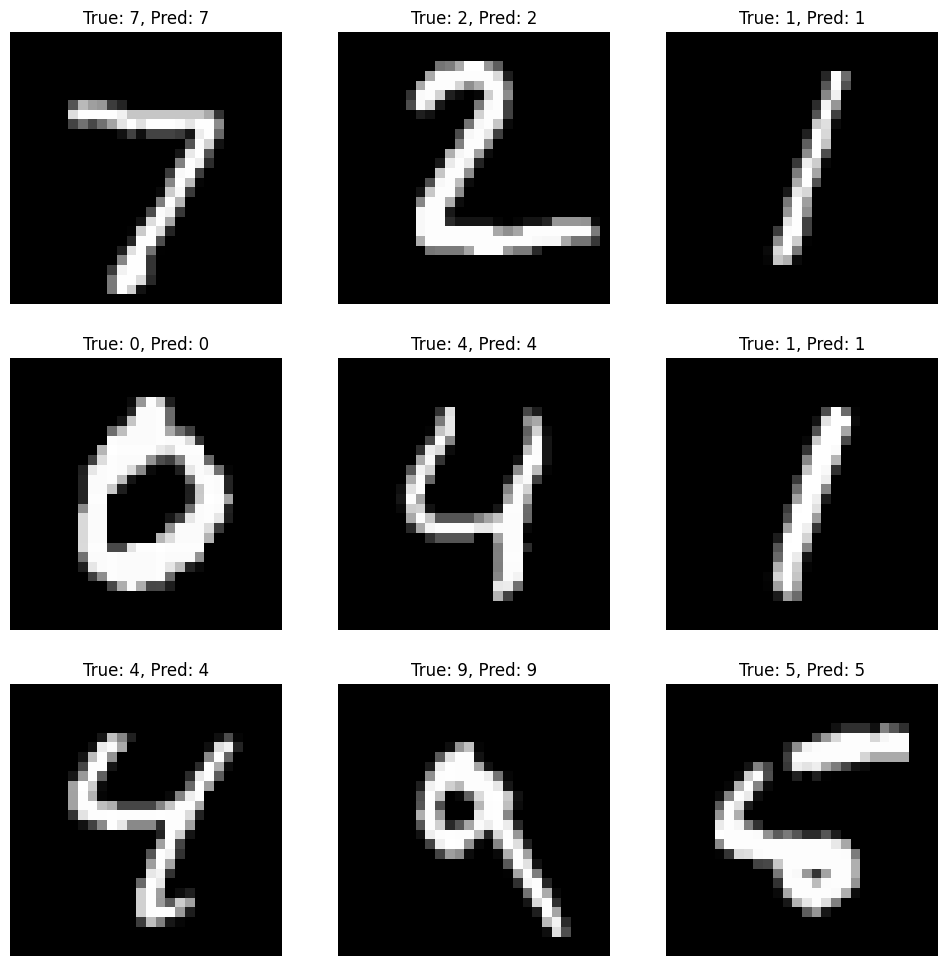

In [31]:
# Display some sample predictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[i]}, Pred: {y_pred_classes[i]}')
    plt.axis('off')
plt.show()

**Real-Time Image Capture and Prediction**

In [24]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image

# Upload the captured image
uploaded = files.upload()


Saving download.png to download.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Number: 4


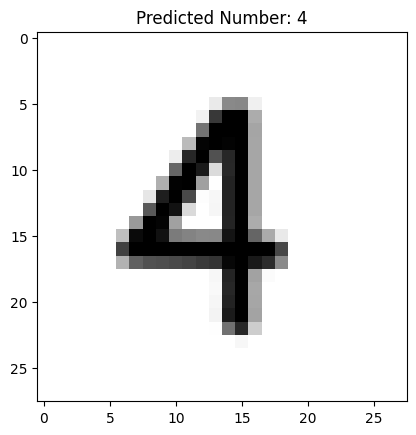

In [25]:
# Process the uploaded image
for file_name in uploaded.keys():
    # Load the image
    image = Image.open(file_name).convert('L')  # Convert to grayscale

    # Resize the image to 28x28 pixels
    resized = image.resize((28, 28))

    # Normalize pixel values to range [0, 1]
    normalized = np.array(resized).astype('float32') / 255

    # Reshape the image for the model (1, 28, 28, 1)
    reshaped = np.reshape(normalized, (1, 28, 28, 1))

    # Predict the number using the trained model
    prediction = model.predict(reshaped)
    number = np.argmax(prediction)

    # Display the prediction
    print(f'Predicted Number: {number}')

    # Optionally display the processed image
    import matplotlib.pyplot as plt
    plt.imshow(normalized, cmap='gray')
    plt.title(f'Predicted Number: {number}')
    plt.show()
